# INTRODUCTION

## Background

#### Dataset Details

The dataset used for this study describes the sales of individual residential properties from 2006 to 2010 (4 years) in a small town in the United States of America. It consists of two parts:

1. **Property Details:** Includes Parcel identification number (PID), style of dwelling, original construction date, roof style, etc.
2. **Sales Price Data:** Contains sales price information for each property.

#### Instructions

- Ensure the datasets are merged before commencing the analysis.
- The analysis will involve various stages from data cleaning to interpretation and conclusion as outlined above.


#### Conclusion

The analysis aims to provide comprehensive insights into the housing dataset, facilitating better-informed decisions in related domains.

## Aims and Objectives

#### Aim

The aim of this study is to gain a deep understanding of the dataset, paving the way for more informed decisions and gaining insights to how some factors affects the price of houses. Factors such as:
* Location Factors
* Property Specific Factors
* Physical Characteristics
* Construction and Design Features
* Utilities and Infrasturcutre 
* Condition and Quality of Exteriors
* Basement and Foundation Characteristics
* Internal Features
* Amenities
* Sales and Market condition

#### Objectives

The objectives of this coursework include:

- **Data Cleaning and Preprocessing:** Ensuring data accuracy and preparing it for analysis.
- **Descriptive Statistics:** Calculating summary metrics to understand the dataset.
- **Detecting Outliers:** Identifying and handling outliers that might skew analysis.
- **Visualization:** Creating visual representations to comprehend the data more effectively.
- **Identify Patterns:** Recognizing relationships and patterns within the dataset.
- **Interpretation and Conclusion:** Deriving insights and drawing conclusions from the analysis.

# DATA CLEANING/TRANSFORMATION

## Importing Neccesary Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Ingestion

#### Load Datasets

In [2]:
# Load First Dataset

df1 = pd.read_csv("HousingData/Housing_1.txt", delimiter="\t")

# Confirm Dataframe
df1.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [3]:
# Load Second Dataset

df2 = pd.read_csv("HousingData/Housing_2.txt", delimiter="\t")

# Confirm Dataframe
df2.head(5)

,Order,PID,MS SubClass,SalePrice
0,1,526301100,20,215000
1,2,526350040,20,105000
2,3,526351010,20,172000
3,4,526353030,20,244000
4,5,527105010,60,189900


Upon loading the datasets, it became apparent that both dataframes share three common columns—Order, PID, and Ms SubClass. These shared columns hold significant importance for the merging process. The subsequent step involves merging the datasets based on the distinctive columns present in both dataframes, namely PID and Ms Subclass.

#### Merge Dataset

In [4]:
# In order not to have double Order column, we need to drop one, so i dropped the one on df2
df_dropped = df2.drop('Order', axis=1)

# After dropping we merge
# Merge the two dataframes on PID and Ms SubClass
df = pd.merge(df1, df_dropped, on=['PID', 'MS SubClass'])

# View the combined datafrme
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Data Description

In [5]:
# Get shape of merged dataframe
df.shape

(2939, 82)

**The dataframes consists of 82 columns and 2939 rows**

In [6]:
# Get information about your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2939 non-null   int64  
 1   PID              2939 non-null   int64  
 2   MS SubClass      2939 non-null   int64  
 3   MS Zoning        2939 non-null   object 
 4   Lot Frontage     2449 non-null   float64
 5   Lot Area         2939 non-null   int64  
 6   Street           2939 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2939 non-null   object 
 9   Land Contour     2939 non-null   object 
 10  Utilities        2939 non-null   object 
 11  Lot Config       2939 non-null   object 
 12  Land Slope       2939 non-null   object 
 13  Neighborhood     2939 non-null   object 
 14  Condition 1      2939 non-null   object 
 15  Condition 2      2939 non-null   object 
 16  Bldg Type        2939 non-null   object 
 17  House Style   

Here we see that our columns consist primarily of Objects, Integers and floats. Full description of each columns can be found here: [link](HousingData/Housing_Data_Dictionary.txt)

We have factors that we want to use to make our analysis, now we need to streamline our dataframe to contain columns that contain such those, and also separate those columns into the numerical and categorical columns.

**Useful Numerical and Categorical columns in this dataset**

*Let's take a look at the following examples of the numerical columns within our dataset:*
SalesPrice: This column represents the sales price of the house

Lot Area: This column represents the size of a lot in square feet

Gr Liv Area:  This column represents above grade (ground) living area square feet

Overall Qual: This column represents rates of the overall material and finish of the house

Overall Cond: This column represents rates the overall conditions of the house

1st Fir SF: This column represents the first floor in square feet

2nd Fir SF: This column represents the second floor in square feet

Bedroom AbvGr: This column represents bedrooms above grade (does not include basement bedrooms)

Year Built: This column represents the original construction date (this is not technically a numerical column, but we will use it to produce another column called Age )

*Let's take a look at the following examples of the categorical columns within our dataset:*

MS Zoning: This column identifies the general zoning classification of the sale

Lot Shape: This column represents the general shape of the property

Neighborhood: This column represents physical locations within Ames city limits

Bldg Type: This column represents the type of building

Central Air: This column represents central air conditioning

Sale Condition: This column represents condition of sale

Mo Sold: This column represents month sold (MM)

Yr Sold: This column represents year sold (YYYY)


Analyzing columns individually
First, let's define the names of the columns that we are going to use in this analysis. We have a list of the numerical columns and a list of the categorical columns. Then, we will redefine our housing DataFrame with a DataFrame that contains only the columns that we just defined.

In [7]:
# Create a list for Numerical columns
# We are adding the Order colmn to ensure our rows are unique, and the Sales price column
num_col = ["Order","SalePrice","Lot Area","Gr Liv Area","Overall Qual","Overall Cond","Year Built","1st Flr SF","2nd Flr SF","Bedroom AbvGr"]
# Create a list for Categorical columns
cat_col =["MS Zoning","Lot Shape","Neighborhood","Bldg Type","Central Air","Sale Condition","Mo Sold","Yr Sold"]

In [8]:
# Now we create a new dataframe combinig both list
new_df = df[num_col+cat_col]

In [9]:
# Let's get the New size
new_df.shape

(2939, 18)

Now we have been able to reduce our columns from 82 to 18

## Data Cleaning / Wrangling

### Duplicate Values

Firstly, We will need to handle duplicte vlues which could have entered our data ue to human or machine erros and also possibly when we merged or data set. So we check for duplicates..

In [10]:
# Check for duplicate rows on the dataframe
duplicated_rows = new_df[new_df.duplicated(keep=False)]
# Print the duplicate rows
print(duplicated_rows)

     Order  SalePrice  Lot Area  Gr Liv Area  Overall Qual  Overall Cond   
145    146     167500      9300         1264             5             5  \
146    146     167500      9300         1264             5             5   
147    146     167500      9300         1264             5             5   
148    146     167500      9300         1264             5             5   
149    147     108538     10725         1206             5             5   
150    147     108538     10725         1206             5             5   
151    147     108538     10725         1206             5             5   
152    147     108538     10725         1206             5             5   
153    148     159500     10032         1580             6             5   
154    148     159500     10032         1580             6             5   
155    148     159500     10032         1580             6             5   
156    148     159500     10032         1580             6             5   

     Year B

Here we see that we have 12 duplicated rows, now we need to delete the duplicated rows

In [11]:
# Remove duplicate

new_df = new_df.drop_duplicates()

#check if we have duplicates
print(new_df[new_df.duplicated(keep=False)])

Empty DataFrame
Columns: [Order, SalePrice, Lot Area, Gr Liv Area, Overall Qual, Overall Cond, Year Built, 1st Flr SF, 2nd Flr SF, Bedroom AbvGr, MS Zoning, Lot Shape, Neighborhood, Bldg Type, Central Air, Sale Condition, Mo Sold, Yr Sold]
Index: []


As we can see we have no duplicates in our dataframe which is good, but lets confirm if it didn't delete the rows with Order (146, 147, 148)

In [12]:
# First we define the values to check for 
values_to_check = [146, 147, 148]

# Now we check if the rows exist in the dataframe based on the order column
value_present = new_df[new_df['Order'].isin(values_to_check)].any(axis=0).any()

print(value_present)

new_df.shape

True


(2930, 18)

Since the values are there, we have successfully deleted the duplicates then we proceed to check for missing Values

### Missing Values

In [13]:
# Get the Sum of missing values

# Get the list of column in the dataframe
column_list= new_df.columns.to_list()

# Now we create a function that would count missing values 
def count_missing_values(column_list: list): # It takes a list as a parameter
    # Create an empty list to store the name of column that have missing missing values
    missing_column_list = []

    print(25 * '*')
    # Use a for loop to iterate over the columns then calculate the sum of mising values of each column
    for column in column_list:
        # Check if the sum of missing values is greater than zero
        if new_df[column].isnull().sum() > 0:
            # Append to the dictionary
            missing_column_list.append(column)
            # If true print out
            print(f'{column} --- {new_df[column].isnull().sum()}')
            print(25 * '*')
    return missing_column_list


In [14]:
# Call the function, and assgin it to a vairable
missing_column_list = count_missing_values(column_list)

*************************


In [15]:
# To the get the number of columns with missing values, we get the lenght of the dictionary
len(missing_column_list)

0

Now we have no missing value in any column, now we need to ensure that all columns are the right type.

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 0 to 2938
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order           2930 non-null   int64 
 1   SalePrice       2930 non-null   int64 
 2   Lot Area        2930 non-null   int64 
 3   Gr Liv Area     2930 non-null   int64 
 4   Overall Qual    2930 non-null   int64 
 5   Overall Cond    2930 non-null   int64 
 6   Year Built      2930 non-null   int64 
 7   1st Flr SF      2930 non-null   int64 
 8   2nd Flr SF      2930 non-null   int64 
 9   Bedroom AbvGr   2930 non-null   int64 
 10  MS Zoning       2930 non-null   object
 11  Lot Shape       2930 non-null   object
 12  Neighborhood    2930 non-null   object
 13  Bldg Type       2930 non-null   object
 14  Central Air     2930 non-null   object
 15  Sale Condition  2930 non-null   object
 16  Mo Sold         2930 non-null   int64 
 17  Yr Sold         2930 non-null   int64 
dtypes: int64(12),

### Handle Outlier

In [17]:
# We need to check for some outliers, but before we start let quickly decribe our data frame
new_df.describe()

,Order,SalePrice,Lot Area,Gr Liv Area,Overall Qual,Overall Cond,Year Built,1st Flr SF,2nd Flr SF,Bedroom AbvGr,Mo Sold,Yr Sold
count,2930.00000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,180796.060068,10147.921843,1499.690444,6.094881,5.563140,1971.356314,1159.557679,335.455973,2.854266,6.271331,2007.790444
std,845.96247,79886.692357,7880.017759,505.508887,1.411026,1.111537,30.245361,391.890885,428.395715,0.827731,3.572365,1.316613
min,1.00000,12789.000000,1300.000000,334.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000,1.000000,2006.000000
25%,733.25000,129500.000000,7440.250000,1126.000000,5.000000,5.000000,1954.000000,876.250000,0.000000,2.000000,4.000000,2007.000000
50%,1465.50000,160000.000000,9436.500000,1442.000000,6.000000,5.000000,1973.000000,1084.000000,0.000000,3.000000,6.000000,2008.000000
75%,2197.75000,213500.000000,11555.250000,1742.750000,7.000000,6.000000,2001.000000,1384.000000,703.750000,3.000000,8.000000,2009.000000
max,2930.00000,755000.000000,215245.000000,5642.000000,10.000000,9.000000,2010.000000,5095.000000,2065.000000,8.000000,120.000000,2010.000000


From the Sales Price column, We see that the mean price is 180,000, the minimum value is 13,000, median and 75 percentile is 160,000 and 213,000 respectively an the maximum price is 755,000. To me it shows something is fishy, meaning there's an outlier present.

Also for the Mo sold column, we have a minimum value of 1, median of 6 and maximum of 120. This is month represented in numbers, so 120 to me is basically a typo error, but let's check

In [18]:
# Let's check the unique values in mo sold column

new_df['Mo Sold'].unique()

array([  5,   6,   4,   3,   1,   2,   7,  10,   8,  11,   9,  12,  60,
       120], dtype=int64)

We can see that have two ambigious value (60 and 120) which clearly looks like an human or machine error. Let's check for this values to confirm

In [19]:
new_df[(new_df["Mo Sold"] == 60) | (new_df["Mo Sold"] == 120)]

,Order,SalePrice,Lot Area,Gr Liv Area,Overall Qual,Overall Cond,Year Built,1st Flr SF,2nd Flr SF,Bedroom AbvGr,MS Zoning,Lot Shape,Neighborhood,Bldg Type,Central Air,Sale Condition,Mo Sold,Yr Sold
550,542,153000,12450,1114,5,5,2003,1114,0,3,RL,Reg,SawyerW,1Fam,Y,Normal,60,2009
848,840,207000,14753,1463,7,5,1998,1463,0,3,RL,IR2,CollgCr,1Fam,Y,Normal,120,2009


In [20]:
# Now we can see that it's just a misatke that happend, so we need to fix it 

new_df.loc[new_df['Mo Sold'] == 60, 'Mo Sold'] = 6
new_df.loc[new_df['Mo Sold'] == 120, 'Mo Sold'] = 12

new_df['Mo Sold'].unique()

array([ 5,  6,  4,  3,  1,  2,  7, 10,  8, 11,  9, 12], dtype=int64)

In [21]:
new_df["Mo Sold"].describe()

count    2930.000000
mean        6.216041
std         2.714492
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: Mo Sold, dtype: float64

No we have been able to work on the Mo Sold, Let's work on the SalePrice

On the Data Dictionary [link](HousingData/Housing_Data_Dictionary.txt), the special note suggests that there are specific outliers or unusual observations within the dataset that might affect the analysis or model's performance. These observations can be identified by plotting the 'SALE PRICE' against the 'GR LIV AREA' (Ground Living Area), as it will quickly highlight these particular data points.

It mentions five observations that one might consider removing:

* Three True Outliers: These are observations that are considered as outliers and likely don't represent actual market values. They might be atypical or erroneous data points.

* Two Unusual Sales: These are not true outliers but are considered unusual due to the characteristics of very large houses with relatively appropriate prices. They might not fit the general trend of the dataset.

The recommendation is to remove any houses from the dataset that have more than 4000 square feet of Ground Living Area. This action intends to eliminate these five specific observations, which are identified as outliers or unusually large properties, to ensure the dataset is more representative of the typical market scenario or general patterns in housing prices.

This helps to refine the dataset by excluding extreme observations that could disproportionately impact the analysis.

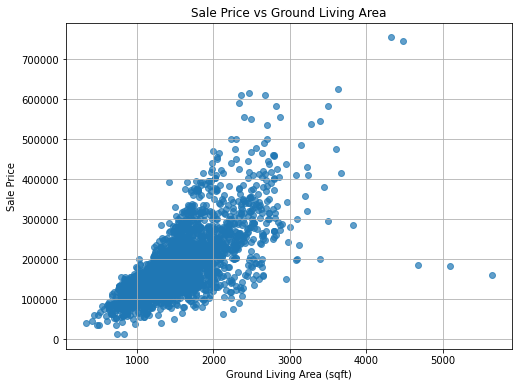

In [22]:
# Plotting 'GR LIV AREA' against 'SALE PRICE'
plt.figure(figsize=(8, 6))
plt.scatter(new_df['Gr Liv Area'], new_df['SalePrice'], alpha=0.7)
plt.title('Sale Price vs Ground Living Area')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

Here we can clearly see the 5 outliers spoken about earlier on the right sode of the graph, Lets's have a look at the them in a tabular form

In [23]:
new_df[new_df['Gr Liv Area'] > 4000][['Gr Liv Area', 'SalePrice']]

,Gr Liv Area,SalePrice
1507,5642,160000
1769,4476,745000
1776,4316,755000
2189,5095,183850
2190,4676,184750


In [24]:
# Let's remove the outliers

new_df = new_df[new_df['Gr Liv Area'] <= 4000]

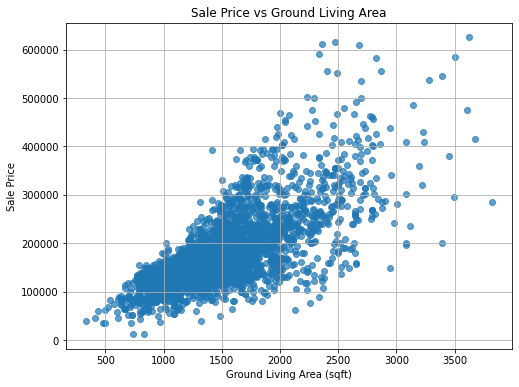

In [25]:
# let's check again

# Plotting 'GR LIV AREA' against 'SALE PRICE'
plt.figure(figsize=(8, 6))
plt.scatter(new_df['Gr Liv Area'], new_df['SalePrice'], alpha=0.7)
plt.title('Sale Price vs Ground Living Area')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

In [26]:
# Let's check our column description

new_df["SalePrice"].describe()

count      2925.000000
mean     180411.574701
std       78554.857286
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      625000.000000
Name: SalePrice, dtype: float64

### Add Column

Let's define a new variable, Age , as the year in which the house was sold minus the year in which the house was built.

Then, we will remove the YearBuilt variable from our numerical variables and replace it with the Age variable, and do the plot again to see how the distribution of age appears:

In [27]:
# Create age column, subtracting the Year Built column from 
new_df["Age"] = new_df["Yr Sold"] - new_df["Year Built"]

num_col.append("Age")

# DATA EXPLORATION AND ANALYSIS

**Understanding the main variable**

Let's talk about the main variable that we want to understand, the SalePrice of the house.

## Summary Statistics

In [28]:
new_df['SalePrice'].describe()

count      2925.000000
mean     180411.574701
std       78554.857286
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      625000.000000
Name: SalePrice, dtype: float64

So here in the descriptive statistics of column SalePrice, we have an idea of the range of values for this variable. In the preceding column, we see that the mean price in the dataset is `$180,000` for the average house. We have a standard deviation of around `$79,000` . The minimum value that corresponds to the cheapest house in the dataset is around `$13,000`, and the maximum value that corresponds to the most expensive house in the dataset is `$625,000`.

For numericalvariables, a typical way to understand the variable visually is with a histogram.

## Data Visualisation

### Univariate Analysis

#### Histograms

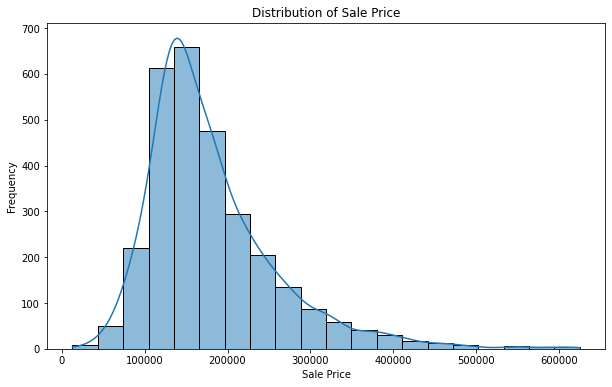

In [29]:
# Plot figure
plt.figure(figsize=(10, 6))
# Use Seaborn histogram plot
sns.histplot(new_df['SalePrice'], bins=20, kde=True)
# Set title
plt.title('Distribution of Sale Price')
#Set X axis label
plt.xlabel('Sale Price')
#Set Y axis label
plt.ylabel('Frequency')

plt.show()

In [30]:
# skewness and kurtosis 
print("Skewness:{:0.3f}".format(new_df["SalePrice"].skew()))
print("Kurtosis:{:0.3f}".format(new_df["SalePrice"].kurt()))

Skewness:1.591
Kurtosis:3.840


Here, we see that very few houses are priced below `$100,000`, so most of the houses are concentrated between `$100,000` and `$200,000`. The other thing that we notice here is that we have very few observations with very high prices. We have few houses above `$400,000`, and the distribution has a long tailthat we can confirm with the following numerical statistics, the Skewness and the Kurtosis. A skewness of 0 will tell us that we have a symmetric distribution, and, if we have a positive value, it will tell us that we have a positive tail similar to the one that we observed here. We have Skewnes of 1.591, which indicates a moderately positive skewness, suggesting that the data is skewed to the right. The kurtosis will tell us the thickness of your distribution, and, as we can see here, we have very high values concentrated around `$100,000` and `$200,000`, which is why we got a kurtosis of 3.840 indicates a positive excess kurtosis, implying that the distribution has heavier tails and a sharper peak compared to the normal distribution.

#### Numerical variables

If we want to examine all the numerical variables in the dataset, we can do it very easily with the hist method. BUt befoe that we need to get the summary

## Summary Statistics

In [31]:
# we need to remove Order column because it uniqely identifies each row
num_col.remove('Order')
# Check 
new_df[num_col].describe()

,SalePrice,Lot Area,Gr Liv Area,Overall Qual,Overall Cond,Year Built,1st Flr SF,2nd Flr SF,Bedroom AbvGr,Age
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,180411.574701,10103.583590,1493.978803,6.088205,5.563761,1971.302906,1155.461197,333.832821,2.853675,36.488547
std,78554.857286,7781.999124,486.273646,1.402953,1.112262,30.242474,376.592039,425.841983,0.827737,30.287557
min,12789.000000,1300.000000,334.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000,0.000000
25%,129500.000000,7438.000000,1126.000000,5.000000,5.000000,1954.000000,876.000000,0.000000,2.000000,7.000000
50%,160000.000000,9428.000000,1441.000000,6.000000,5.000000,1973.000000,1082.000000,0.000000,3.000000,34.000000
75%,213500.000000,11515.000000,1740.000000,7.000000,6.000000,2001.000000,1383.000000,702.000000,3.000000,54.000000
max,625000.000000,215245.000000,3820.000000,10.000000,9.000000,2010.000000,3820.000000,1862.000000,8.000000,136.000000


## Data Visualisation

### Univariate Analysis

#### Histogram

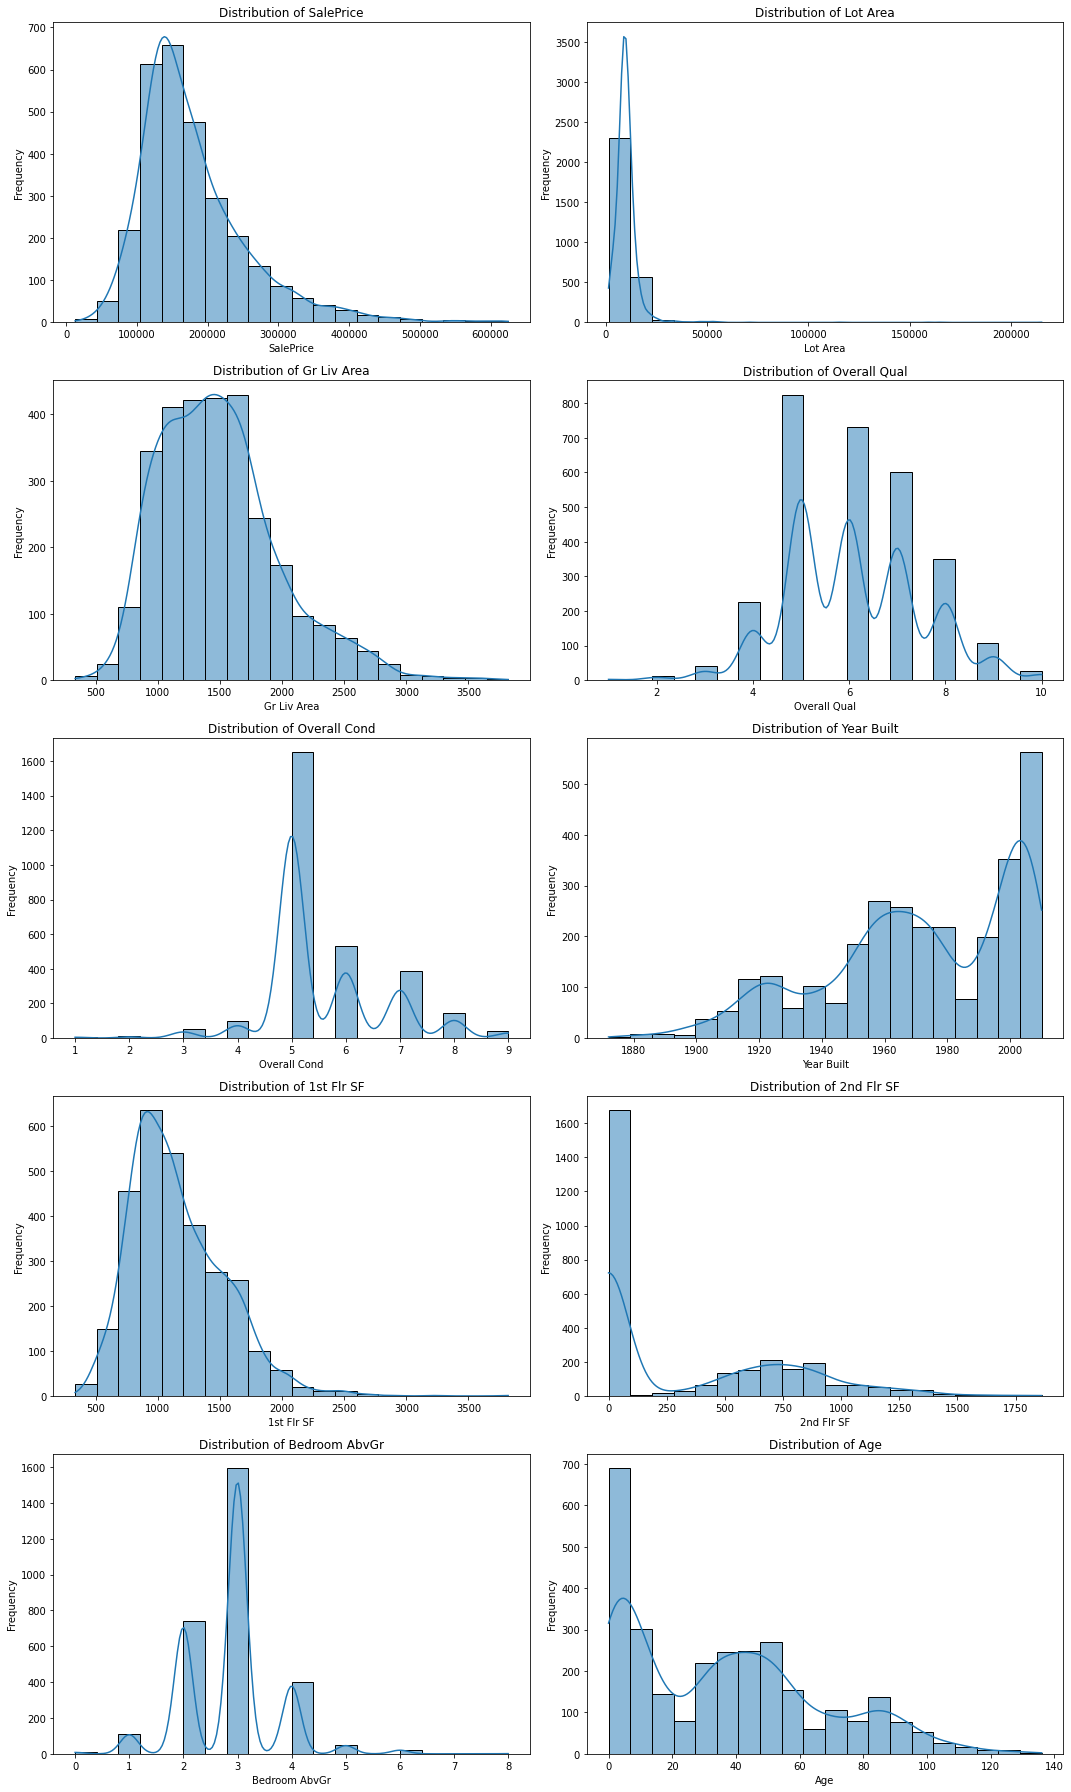

In [32]:
# Define the number of columns in a row for subplots
num_cols_per_row = 2  # Set the number of histograms to display side by side in each row

# Calculate the number of rows needed for all numerical columns
num_rows = (len(num_col) + num_cols_per_row - 1) // num_cols_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5*num_rows))

# Flatten axes to handle different cases of number of rows and columns
axes = axes.flatten()

# Loop through numerical columns and plot histograms
for i, col in enumerate(num_col):
    sns.histplot(new_df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

The following is what we observe for each histogram:

* The distribution of sizes in the first floor, as you can see, is skewed to the right. So what it tells you is that you have very few big houses, but most of the houses have these values around 800 to 1,200 square feet.
* You see a big bar around 0 in the 2ndFlrSF variable. Those are the variables that don't have a second floor.
* Most houses have three bedrooms.
* Most Houses have a ground living area between 1000 - 1750 square feet.
* The lot area is highly skewed; there are few houses with a large amount of area. Most houses have lot area below 25,000
* The ratings for Quality tend to be range from 5 - 7; few houses have very low quality.
* The ratings for conditions tend to be around 5; few houses have very high or low ratings.
* The YearBuilt variable is actually not useful in its present form. However, more houses are built in 2000's
* We have a big bar on 0 on the Age column, meaning almost 700 houses were sold new.

Now let's talk about the categoorical vairables, firstly summary statistics:

#### Categorical variables

The type of plot that is recommended for a categorical variable is the bar plot.

## Summary Statistics

In [33]:
# Let's print Every unique item on the categorical list to verify and confirm they're in Order
print(25 * '-')
for col in cat_col:
    print(col)
    print('No of Unique Values: ', new_df[col].nunique())
    print(new_df[col].unique())
    print(25 * '-')

-------------------------
MS Zoning
No of Unique Values:  7
['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']
-------------------------
Lot Shape
No of Unique Values:  4
['IR1' 'Reg' 'IR2' 'IR3']
-------------------------
Neighborhood
No of Unique Values:  28
['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
-------------------------
Bldg Type
No of Unique Values:  5
['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
-------------------------
Central Air
No of Unique Values:  2
['Y' 'N']
-------------------------
Sale Condition
No of Unique Values:  6
['Normal' 'Partial' 'Family' 'Abnorml' 'Alloca' 'AdjLand']
-------------------------
Mo Sold
No of Unique Values:  12
[ 5  6  4  3  1  2  7 10  8 11  9 12]
-------------------------
Yr Sold
No of Unique Values:  5
[2010 20

### Univariate Analysis

#### Barplot

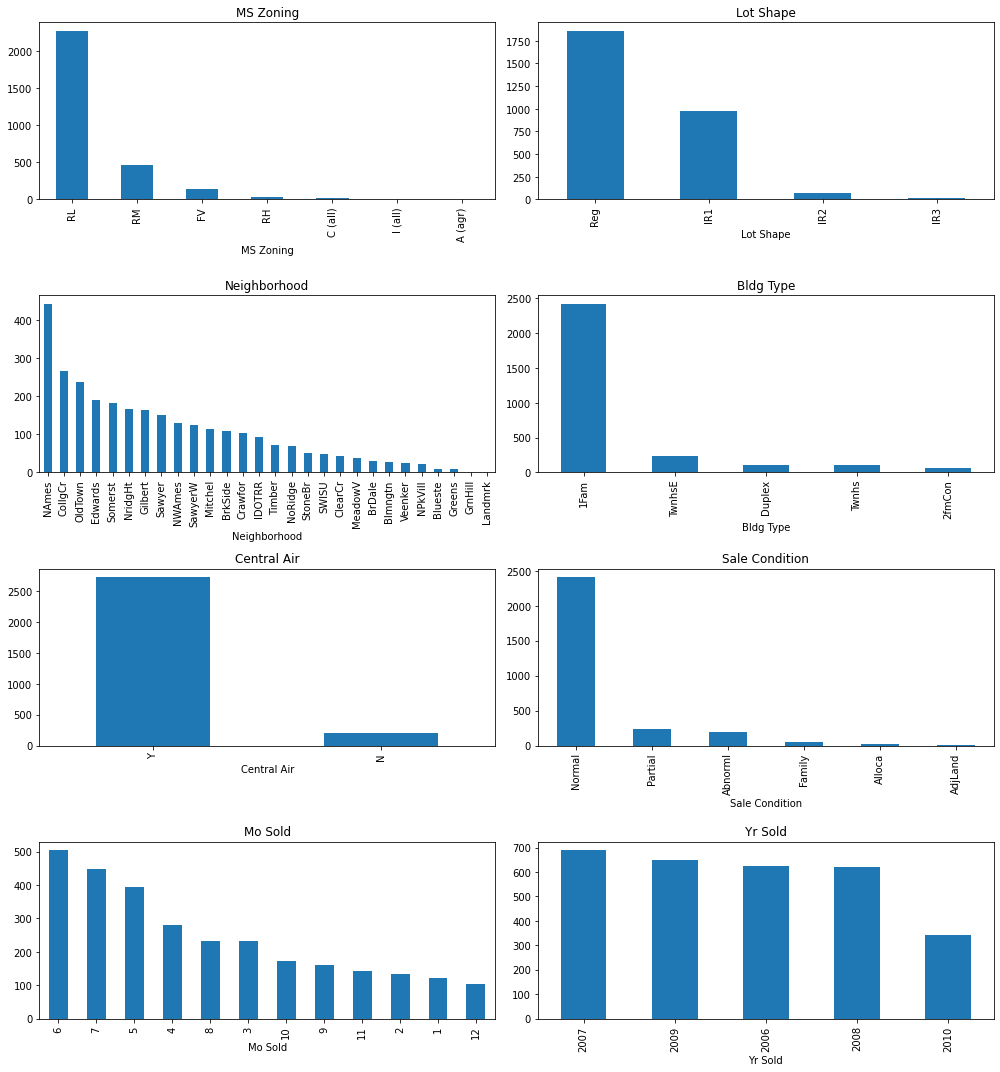

In [34]:
# Now let's view the visually

#Firstly, i'll create a figure and an axis object with the Matplotlib plt.subplot function.
# With a grid of 4 rows and 2 columns, which will give us 8 subplots. We then assign the figsize as (10, 6)
fig, ax = plt.subplots(4,2, figsize=(14,15))

# Now we loop over every categorical variable in every subplot in this ax.flatten() object
for var, subplot in zip(cat_col, ax.flatten()):
    
    # Now we calculate the value count, the plot a bar chat using the subplot as the axis of the plot
    new_df[var].value_counts().plot(kind='bar', ax=subplot,title=var)
    
fig.tight_layout()

In order to have a better understanding between the variables and SalePrice, we need to remove some categories that looks like noise; i.e: they have less than 30 values. To do this, i will write a little function that identifies those levels of category that have less than 30 values. Then we will apply the function to every row in the DataFrame. Then we have a loop that will detect and keep the observations where the levels have more than 30 observations:

In [35]:
# Let's create the function

# Create function name
def identify_categories_above_30(series):
    # Create a variable to count the values in the column
    counts = series.value_counts()
    # return a list holding columns that have levels greater than 30
    return list(counts[counts>=30].index)

In [36]:
# Now lets apply the function

#create a variable then assign the categorical to the fcuntion
levels_to_keep = new_df[cat_col].apply(identify_categories_above_30, axis=0)
# Print them
levels_to_keep

MS Zoning                                              [RL, RM, FV]
Lot Shape                                           [Reg, IR1, IR2]
Neighborhood      [NAmes, CollgCr, OldTown, Edwards, Somerst, Nr...
Bldg Type                     [1Fam, TwnhsE, Duplex, Twnhs, 2fmCon]
Central Air                                                  [Y, N]
Sale Condition                   [Normal, Partial, Abnorml, Family]
Mo Sold                     [6, 7, 5, 4, 8, 3, 10, 9, 11, 2, 1, 12]
Yr Sold                              [2007, 2009, 2006, 2008, 2010]
dtype: object

In [37]:
# Now let's use our level to keep, to remove unwanted levels

# First we loop over the categorical columns:
for var in cat_col:
    # Now  for column, we check if the levels are there, the we keep the ones that are there
    new_df = new_df.loc[new_df[var].isin(levels_to_keep[var])]

In [38]:
# Now let's check the shape of our dataframe

new_df.shape

(2725, 19)

After executing above lines, we end up with fewer observations; 2,725 observations of 19variables.

As we can now see, we don't have those levels. Now, the MSZoning variable has only three levels, the LotShape variable has only three levels, and the SaleCondition variable has only Four levels as well.

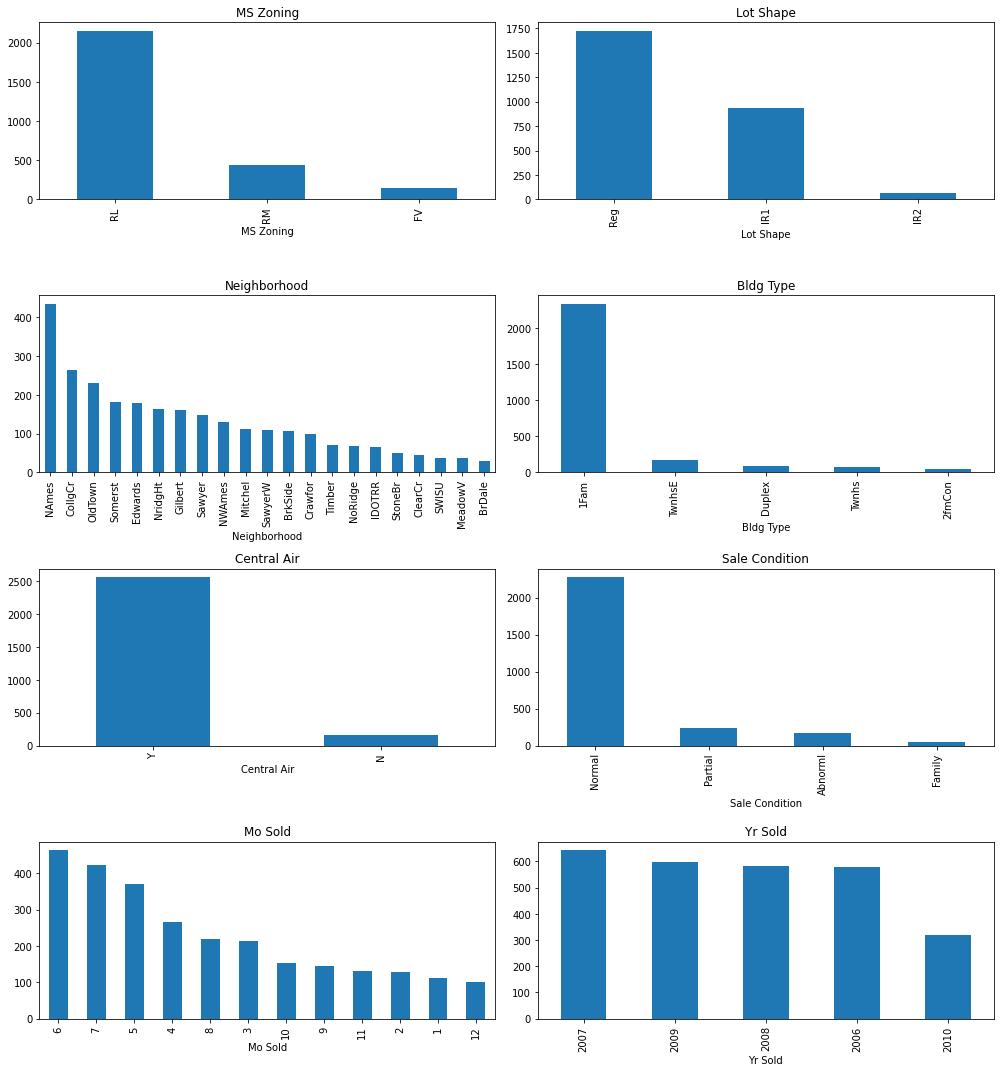

In [39]:
# Now let's view the visually

#Firstly, i'll create a figure and an axis object with the Matplotlib plt.subplot function.
# With a grid of 4 rows and 2 columns, which will give us 8 subplots. We then assign the figsize as (10, 6)
fig, ax = plt.subplots(4,2, figsize=(14,15))

# Now we loop over every categorical variable in every subplot in this ax.flatten() object
for var, subplot in zip(cat_col, ax.flatten()):
    
    # Now we calculate the value count, the plot a bar chat using the subplot as the axis of the plot
    new_df[var].value_counts().plot(kind='bar', ax=subplot,title=var)
    
fig.tight_layout()

As we can now see, we don't have those levels. Now, the MS Zoning variable has only three levels, the Lot Shape variable has only three levels, the bldg type has five levels  and the Sale Condition variable has only three levels as well.

Now Lets review Relationships between variables

### Bivariate Analysis

#### Numerical Variables

The relationships between different variables can be visualized using the namespace plot from matplotlib. The Correlation plot and scatter plot is used for visualizing relationships between two numerical variables, and the box plot is used for visualizing relationships between one numerical variable and one categorical variable.

#### Correlation Plot

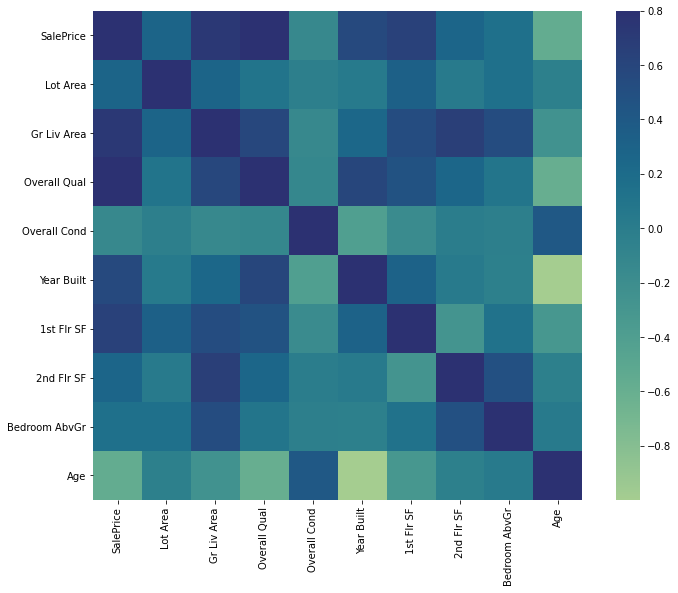

In [40]:

# correlation matrix
corrmat = new_df[num_col].corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8,cmap='crest', square=True)
plt.show()

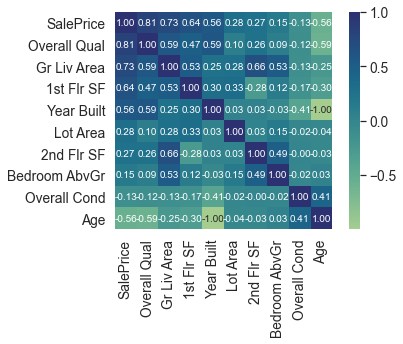

In [41]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(new_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap='crest', annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Here we can see that Overall Qual and GR Live Area has a strong correlation with the SalesPrice, meaning that they both play a strong role in determining the sales price.
Also we see that 1st Flr SF has some correlation with the sales price, and also the year built.


To confirm this futher, we use Scatter plot;

#### Scatter Plots

C:\Users\a\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


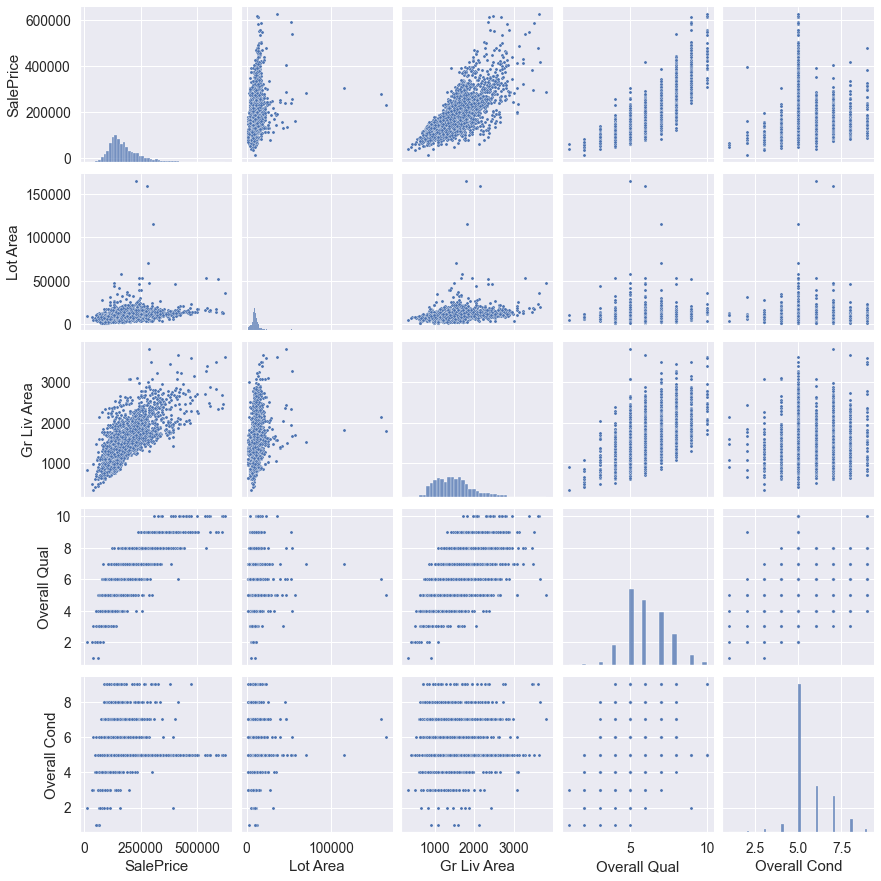

In [42]:
# Lets plot the first 5 variables on the numerical col, so as not to make it noisy
sns.pairplot(new_df[num_col[:5]], plot_kws={"s":10})

Here in the above plot, we have five variables, one of them being the SalePrice of the house, and, as we can see here, we have a very clear positive relationship between the SalePrice of the house and another variable
* Here we see that we have a positive relationship between the GR Liv Area of the house and the SalePrice of the house. So, the GR Liv Area variable is plotted on the x axis, the SalePrice variable on the y axis, and we can see here clearly that there is a positive relationship between these two variables; the more GR Liv Area we have, the likely the higher sale price of the house.
* Next, we have the LotArea, which shows the relationship between the OverallQual and the SalePrice of the house. The relationship is still positive, but is not as clear with the OverallCond of the house.


Next, we will visualize some more numerical variables against SalePrice to see the relationship between them.

C:\Users\a\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


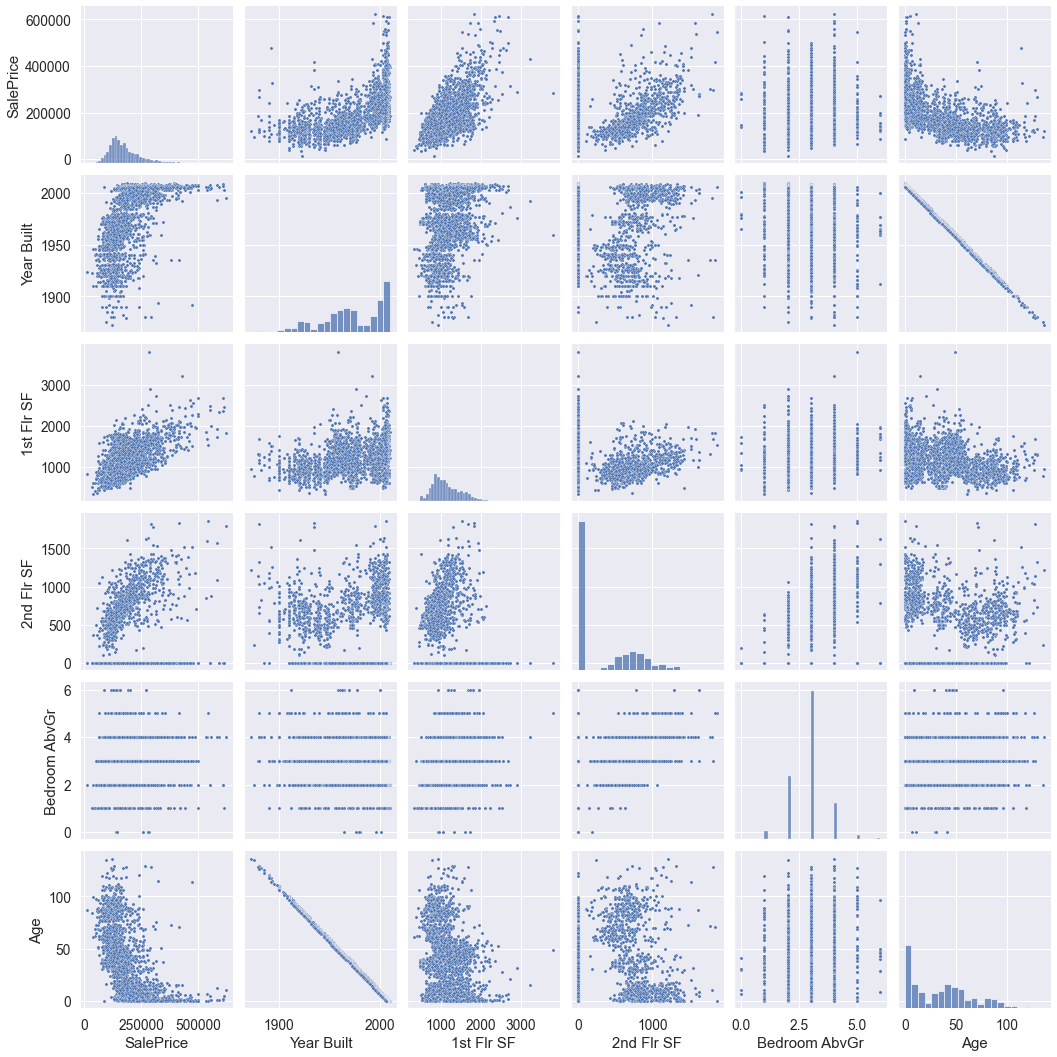

In [43]:
sns.pairplot(new_df[['SalePrice']+num_col[5:]], plot_kws={"s":10})

Here in the above diagram, we see that the SalePrice of the house has a very clear positive relationship with these two variables; the 1stFlrSF of the house and the 2ndFlrSF. We also have a negative relationship that is not linear between the Age and SalePrice variables. We can see here that as the Age goes up, the SalePrice of the house goes down, but this relationship is a curve, not a straight line.

Here, we are interested in the relationship between the categorical variables in our dataset and the SalePrice of the house. The standard plot to examine the relationship between a numerical and a categorical variable is the box plot.

Now, let's visualize the relationship between the SalePrice of the house and the rest of the categorical variables that we have using the box plot:

#### Categorical Variables

### Bivariate Analysis

C:\Users\a\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)
<ipython-input-44-45788f38b815>:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout to prevent overlapping


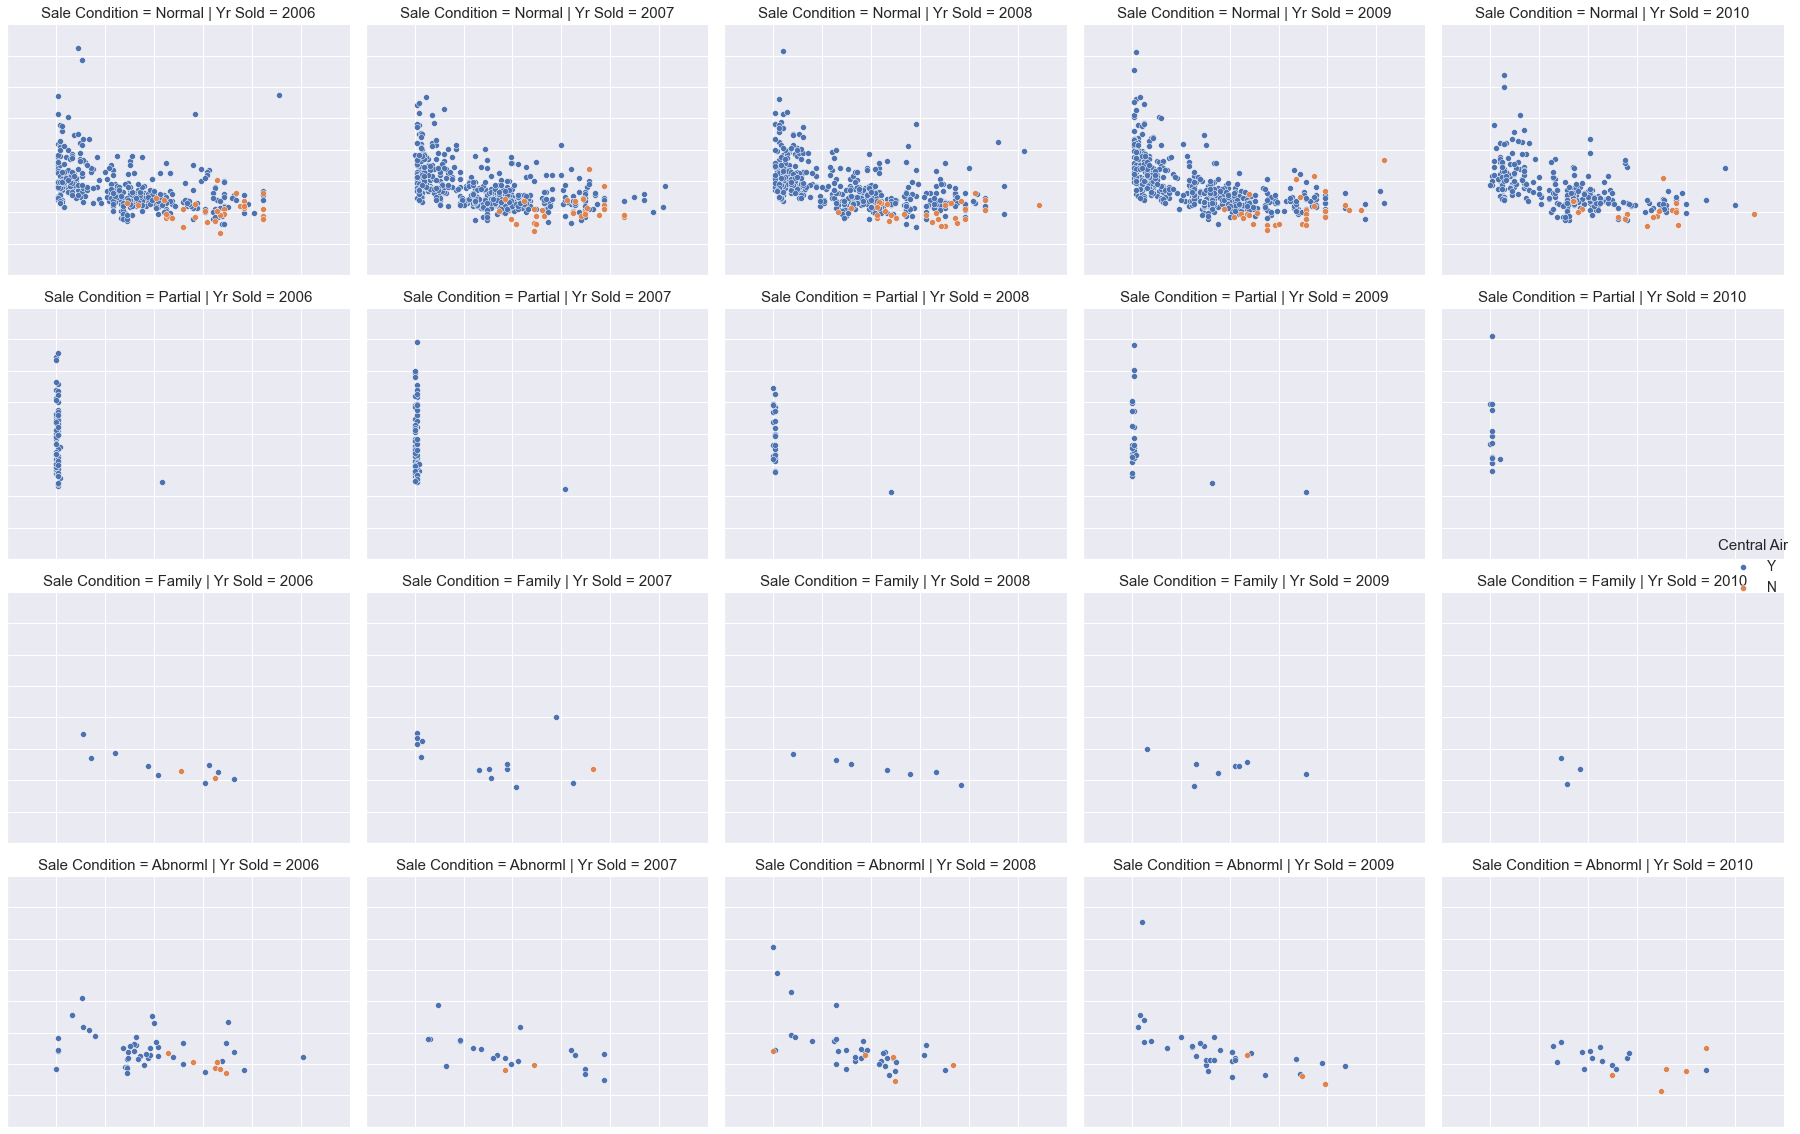

In [44]:
# Initialize a FacetGrid to create a grid of scatter plots based on specified conditions
g = sns.FacetGrid(new_df, col='Yr Sold', row='Sale Condition', hue='Central Air', height=4, aspect=1.2)

# Map a scatterplot onto each subplot in the FacetGrid
g.map_dataframe(sns.scatterplot, x='Age', y='SalePrice')

# Add a legend to differentiate categories represented by the 'Central Air' column with different colors
g.add_legend()

# Adjust x-axis and y-axis label rotation
g.set_xticklabels(rotation=45)
g.set_yticklabels(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show() # Display the plot

Here, we see the box plot of the variable CentralAir that we placed on the x axis and the SalePrice of the house on the y axis. We see that, for houses with no CentralAir, the SalePrice is definitely lower and the distribution of prices is definitely lower than for houses that have CentralAir.

Let's visualize many box plots in a single visualization, as we did previously with scatter plots. Following the same technique of producing a diagram with many subplots, we can iterate through every subplot thus producing the visualization between the categorical column and the SalePrice:

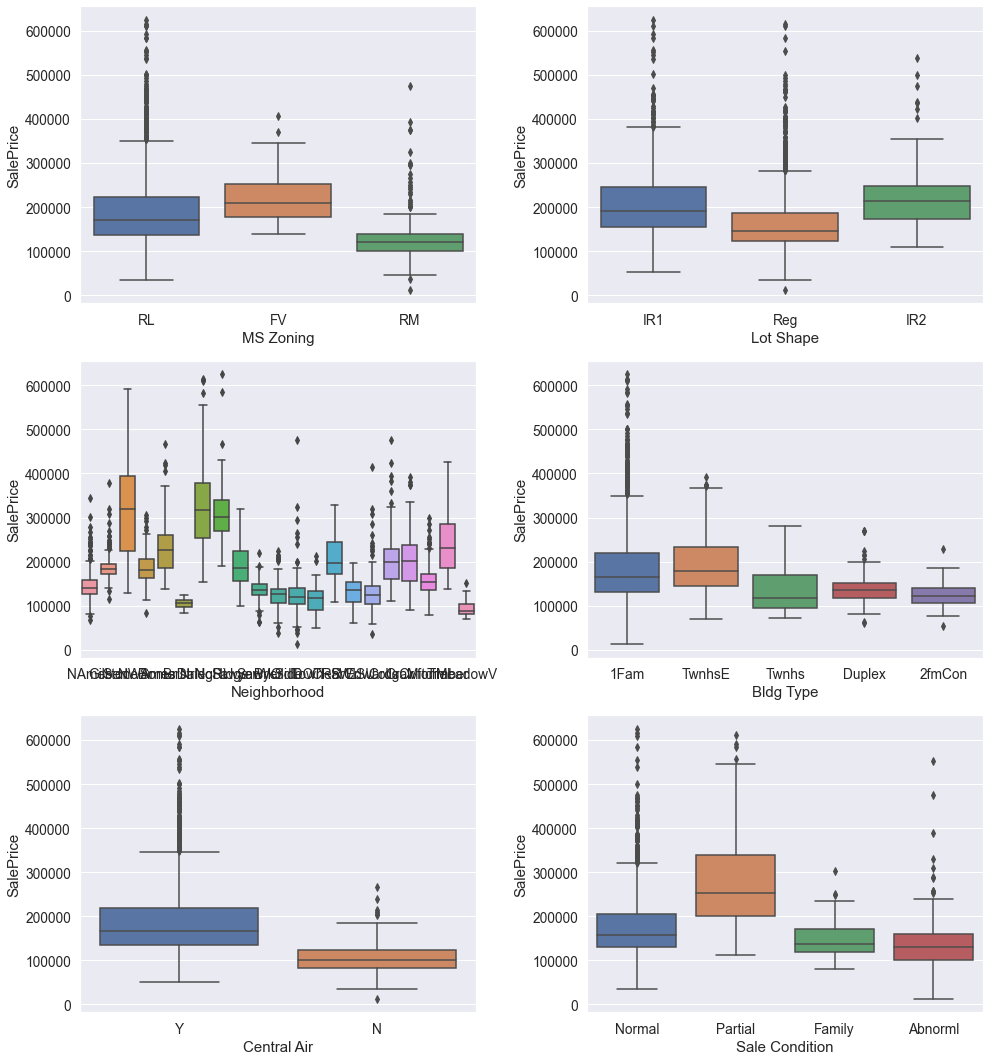

In [45]:
# Create a figure with a 3x2 grid of subplots, each for a categorical variable
fig, ax = plt.subplots(3, 2, figsize=(14,15))

# Iterate through categorical variables and corresponding subplots
for var, subplot in zip(cat_col, ax.flatten()):
    # Create a boxplot for each categorical variable against 'SalePrice'
    sns.boxplot(x=var, y='SalePrice', data=new_df, ax=subplot)

# Adjust layout to prevent subplot overlap
fig.tight_layout()


Here, we see a difference in distribution in the category for the variable MSZoning; the category RM definitely has a distribution with lower sale prices, and, in the Neighborhood variable, we see that there is definitely a different distribution for different neighborhoods.

Let's see the relationship between the Neighborhood and the SalePrice variables:

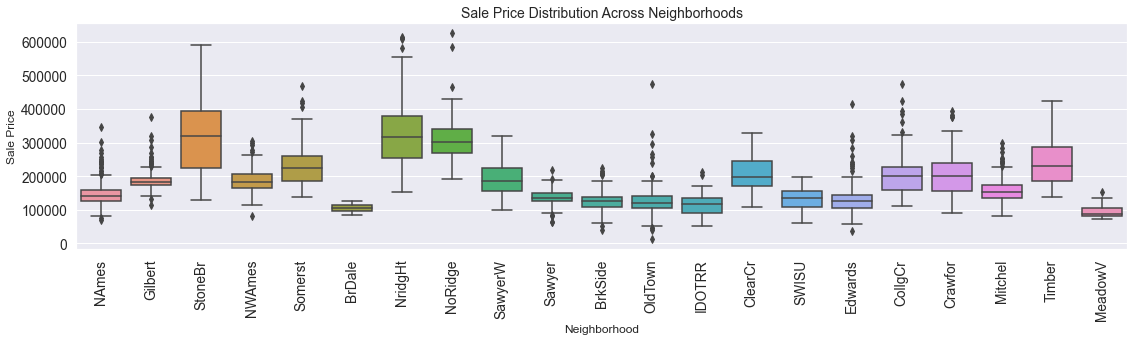

In [46]:
# Create a single boxplot showing the distribution of 'SalePrice' across different neighborhoods
fig, ax = plt.subplots(figsize=(16, 5))

# Generate a boxplot using Seaborn for 'SalePrice' across different neighborhoods
sns.boxplot(x='Neighborhood', y='SalePrice', data=new_df, ax=ax)

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set labels, title, etc. (optional)
ax.set_xlabel('Neighborhood', fontsize=12)  # Set x-label with fontsize
ax.set_ylabel('Sale Price', fontsize=12)    # Set y-label with fontsize
ax.set_title('Sale Price Distribution Across Neighborhoods', fontsize=14)  # Set title with fontsize

plt.tight_layout()
plt.show()

We see that different neighborhoods have varying distributions of price. We can visualize this in a sorted way, from the cheapest neighborhood to the most expensive neighborhood.

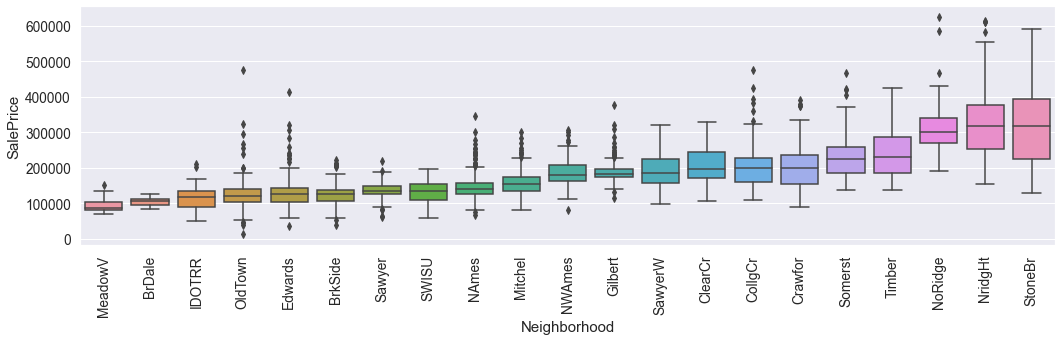

In [47]:
# Calculate median SalePrice for each Neighborhood
median_prices = new_df.groupby('Neighborhood')['SalePrice'].median().sort_values()

# Extract the sorted neighborhood order
sorted_nb = median_prices.index

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(15, 5))

# Create a boxplot showing the distribution of 'SalePrice' across neighborhoods, sorted by median price
sns.boxplot(x='Neighborhood', y='SalePrice', data=new_df, order=sorted_nb, ax=ax)

# Rotate x-axis labels vertically for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

Here we can see that the most expensive neighorhood is StoneBr, which is Stone Brook, while the cheapest neighorhood is MeadowV, which is Meadow Village

# RESULTS AND DISCUSSION

## Key Findings

During the analysis, I observed that majority of the houses had their sales price between `$100,000` to `$200,000`, also Majority of the houses were 3 bedrooms. Also houses were mostly sold on the 6th Month, June. I also noticed that the less houses had no central air and it also affected the Sales price of the Houses. I also observed that the Age of the house didn't affect the market value.

## Interpretation

* Neighborhood emerges as a significant factor influencing sales prices, as the lowest-priced houses in the most expensive neighborhood nearly equate to the higher-priced houses in the less expensive neighborhoods.
* It is evident that houses lacking Central Air exhibit lower Sale Price values, with a discernibly reduced distribution of prices compared to houses equipped with Central Air.
* It is evident that as the ground living area increases, there is a tendency for higher sale prices of houses.
* Townhouse End Unit building type, has the highest sales price.

## Limitations / Recommendations


#### Limitations
* *Limited Temporal Range:* The dataset covers residential property sales from 2006 to 2010, the dataset's temporal range might be limited for certain real estate trends or predictions.
* *Specific Location:* The dataset appears to focus on a single US town, which might limit its generalizability to other locations. Real estate markets can vary significantly between towns, regions, or countries due to different economic, demographic, and geographic factors.
* *Incomplete Information:* Real estate datasets often have missing or incomplete information for certain properties or attributes. For instance, some properties might lack detailed information about their condition, amenities, or sale price, which can affect the analysis.
* *Limited Features:* While the dataset covers various aspects of residential properties, it lacks certain crucial features that influence property values, such as proximity to schools, crime rates, or neighborhood developments.

# References

Markdown- https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

Outliers- https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#what-is-an-outlier

EDA- https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/